In [203]:
import numpy as np
import pandas as pd
import json
import datetime
import nltk
from nltk.corpus import stopwords
from operator import itemgetter 
import matplotlib.pyplot as plt

In [2]:
with open('submission/data.json') as file:
    data = file.read()
    new_data = data.replace('}{', '},{')
    json_data = json.loads(f'[{new_data}]')

In [5]:
submission = pd.DataFrame.from_records(json_data)

In [25]:
submission_timed = submission
submission_timed['time'] = pd.to_datetime(submission['time'])

In [34]:
submission_2020 = submission_timed[submission_timed['time'] >= datetime.date(2020,1,1)]

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [162]:
submission_2020.head()

,author,title,score,time
0,Still-Outside9111,GME Poker 😎🔥🤚💎,1,2021-02-12
1,Crypto_Saiyan,$AMC FTW!,1,2021-02-12
2,wallybet,Whoever Ends Up Going To These Hearings For Ga...,1,2021-02-12
3,enochou,🌈🐻 potential for REGI,1,2021-02-12
4,Tessiturax,Here’s a meme for ya,1,2021-02-12


In [92]:
nasdaq = pd.read_csv('nasdaq.csv')

nasdaq_symbol = nasdaq['Symbol']
nasdaq_market_cap = nasdaq['Market Cap']

nasdaq_symbol_cap = {}

for i, symbol in enumerate(nasdaq_symbol):
    nasdaq_symbol_cap[symbol] = nasdaq_market_cap[i]

In [95]:
nyse = pd.read_csv('nyse.csv')

nyse_symbol = nyse['Symbol']
nyse_market_cap = nyse['Market Cap']

nyse_symbol_cap = {}

for i, symbol in enumerate(nyse_symbol):
    nyse_symbol_cap[symbol] = nyse_market_cap[i]

In [168]:
#title_str = submission_2020['title'].str.lower().str.cat(sep=' ')
title_str = submission_2020['title'].str.cat(sep=' ')

from nltk.corpus import words

#stop_words = set(stopwords.words('english'))  
common_words = set(words.words())
words = nltk.tokenize.word_tokenize(title_str)
words_filtered = [w for w in words if not w.lower() in common_words]
word_freq = nltk.FreqDist(words_filtered)

In [169]:
stock_count = {}

for symbol in nasdaq_symbol:
    if symbol in word_freq:
        stock_count[symbol] = word_freq[symbol]
        
for symbol in nyse_symbol:
    if symbol in word_freq:
        stock_count[symbol] = word_freq[symbol]

In [170]:
count_per_cap = {}

for symbol in stock_count:
    if symbol in nasdaq_symbol_cap and nasdaq_symbol_cap[symbol]:
        count_per_cap[symbol] = stock_count[symbol]/nasdaq_symbol_cap[symbol]
    if symbol in nyse_symbol_cap and nyse_symbol_cap[symbol]:
        count_per_cap[symbol] = stock_count[symbol]/nyse_symbol_cap[symbol]

In [183]:
sort_count_per_cap = sorted(count_per_cap.items(), key = itemgetter(1))

In [212]:
wsb_stock = sort_count_per_cap[-10:]

In [213]:
wsb_stock_name = [stock[0] for stock in wsb_stock[::-1]]
wsb_stock_count_per_cap = [stock[1] for stock in wsb_stock[::-1]]

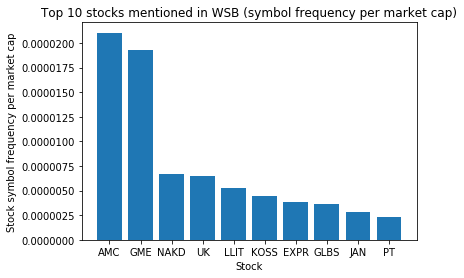

In [215]:
x_pos = [i for i, _ in enumerate(wsb_stock_name)]

plt.bar(x_pos, wsb_stock_count_per_cap)
plt.xlabel("Stock")
plt.ylabel("Stock symbol frequency per market cap")
plt.title("Top 10 stocks mentioned in WSB (symbol frequency per market cap)")

plt.xticks(x_pos, wsb_stock_name)

plt.show()